## <font color = red >2.1  クラス分類と回帰</font>

## <font color = red>2.2  汎化、過剰適合（過学習）、適合不足</fond>

### <font color = blue>2.2.1  モデルの複雑さとデータセットの大きさ</font>

## <font color = red>2.3  教師あり機械学習アルゴリズム</font>

### <font color = blue>2.3.1  サンプルデータセット<font>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import pandas as pd

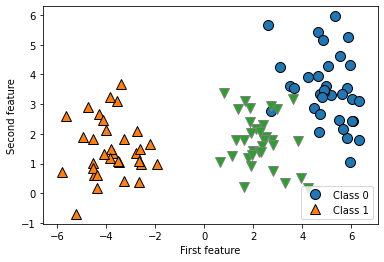

X.shape: (100, 2)


In [3]:
# generate dataset
from sklearn.datasets import make_blobs
# X1, y1 = mglearn.datasets.make_forge()
X, y = make_blobs()
# plot dataset
plt.figure(1)
mglearn.discrete_scatter(X[:,  0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc = 4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()
print("X.shape: {}".format(X.shape))

# plt.figure(2)
# mglearn.discrete_scatter(X1[:,  0], X1[:, 1], y1)
# plt.legend(["Class 0", "Class 1"], loc = 4)
# plt.xlabel("First feature")
# plt.ylabel("Second feature")
# plt.show()
# print("X1.shape: {}".format(X1.shape))


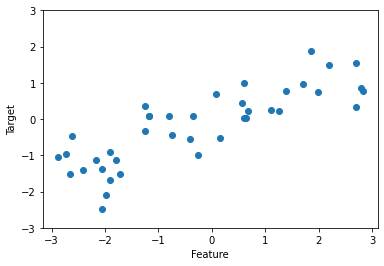

In [4]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [6]:
print("Shape of cancer data:{} \n".format(cancer.data.shape))

Shape of cancer data:(569, 30) 



In [7]:
print("Sample counts per class:\n{}".format(
    {
        n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))
    }
))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [8]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [10]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


## <font color = blue>2.3.2  k-最近傍法（K-NN）</font>

### 2.3.2.1  k-最近傍法によるクラス分類

/Users/kanzakiken/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


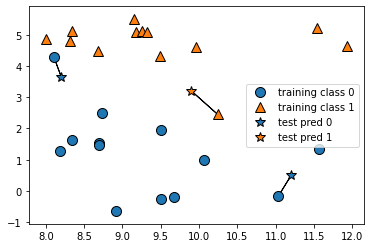

In [11]:
# knnの中 k=1の状況
mglearn.plots.plot_knn_classification(n_neighbors=1)

/Users/kanzakiken/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


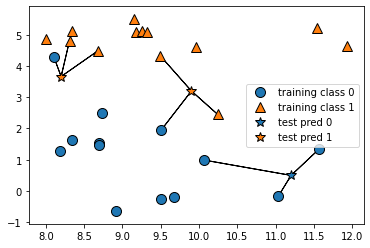

In [12]:
# knnの中 k=3の状況
mglearn.plots.plot_knn_classification(n_neighbors = 3)

In [13]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

/Users/kanzakiken/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [15]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [16]:
print("Test set prediction: {}".format(clf.predict(X_test)))

Test set prediction: [1 0 1 0 1 0 0]


In [17]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


### 2.3.2.2  KneighborsClassifierの解析

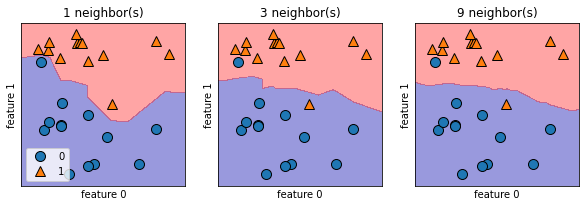

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # fitメソッドは自分自身を返すので､一行で
    # インスタンスを生成してfitすることができる
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

axes[0].legend(loc=3)

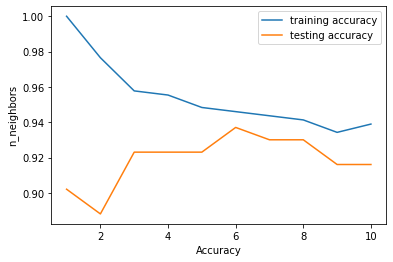

In [19]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66
)

training_accuracy = []
test_accuracy = []

# try n_neighbor from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record testing set accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="testing accuracy")
plt.xlabel("Accuracy")
plt.ylabel("n_neighbors")
plt.legend()

### 2.3.2.3  k-近傍回帰

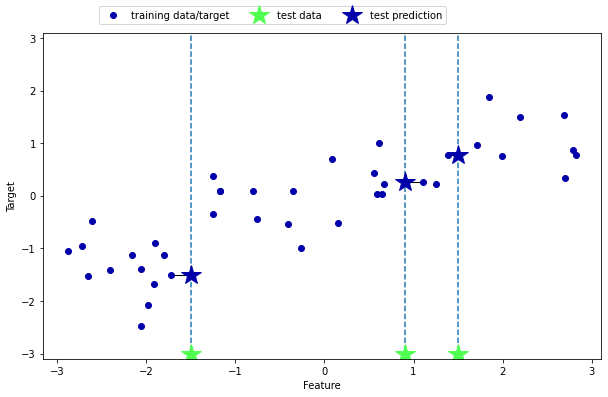

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

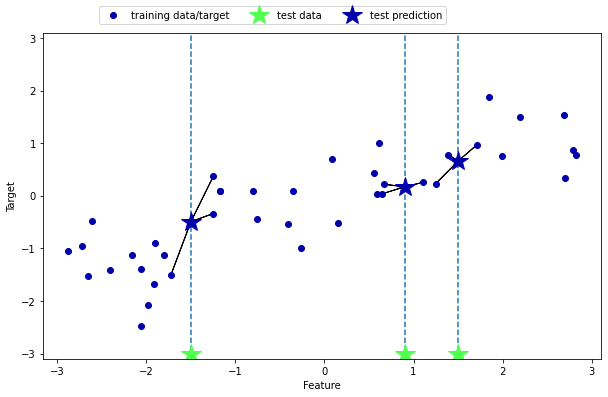

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [22]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# waveデータセットをテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 3つの最近傍点を考慮するように設定してモデルのインスタンスを生成
reg = KNeighborsRegressor(n_neighbors=3)
# 訓練データと訓練ターゲットを用いてモデルを学習させる
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [23]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [24]:
print("Test set R^2: {:.3f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.834


<font color = green size = 5>R^2の計算過程<font>

In [25]:
# true value of Test set 

<b>y_test<b> : $y_i$

In [26]:
# predict value of Test set
reg_test = reg.predict(X_test)

<b>reg_test<b> : $\hat y_i$

In [27]:
# The average of y_test(using true value)
y_ = np.mean(y_test) 

$\bar y$

In [28]:
# 全平方和:Total sum of squares(TSS) (using true value)
TSS = np.sum((y_test - y_)**2)

$TSS = \displaystyle \sum^{n}_{i=1}{（y_i - \bar y）^2}$
<br>

In [29]:
# 回帰平方和:The explained sum of squares (ESS) (using predict value)
ESS = np.sum((reg_test - y_)**2)

$ESS = \displaystyle \sum^{n}_{i=1}{（\hat y_i - \bar y）^2}$

In [30]:
# 残差平方和:Residual sum of squares(RSS) (using predict and true value)
RSS = np.sum((reg_test - y_test)**2)

$RSS = \displaystyle \sum^{n}_{i=1}{（y_i - f(x_i)）^2}$

---

一般的に <br>
$全平方和 = 回帰平方和 + 残差平方和$ <br>
すなわち<br>
$\displaystyle \sum^{n}_{i=1}{（y_i - \bar y）^2} = \displaystyle \sum^{n}_{i=1}{（\hat y_i - \bar y）^2} + \displaystyle \sum^{n}_{i=1}{（y_i - f(x_i)）^2}$

$TSS = ESS + RSS$

In [31]:
# R^2 coefficient of determination
R_square = 1 - (RSS / TSS)

$ R^2 = 1 - \frac {RSS}{TSS} $

In [32]:
# R_squareとreg.score()が等しいことを確認します
if R_square == reg.score(X_test, y_test):
    print("True")

True


### 2.3.2.4  KNeighborsRegressorの解析

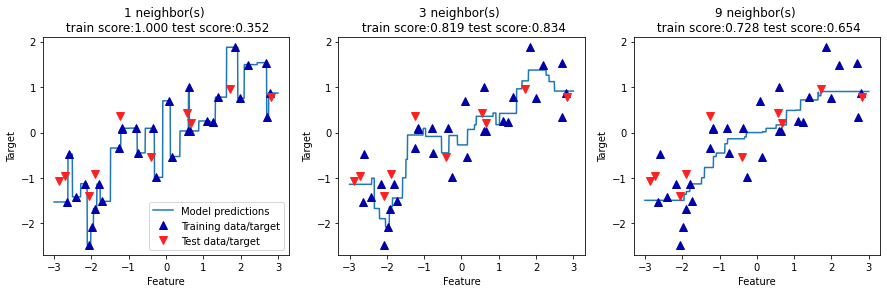

In [33]:
# 3つのグラフを作る
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# -3から3までの間に１，000点のデータポイントを作る
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 近傍点で予測
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} neighbor(s) \n train score:{:.3f} test score:{:.3f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)
        )
    )
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")

axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")
plt.show()

### 2.3.2.5  利点と欠点とパラメーター

<b>kneighbors分類器は2つの重要なパラメーター:<b>
- 近傍点の数 （3-5個で十分な場合がほとんどだが､調整する必要がある）
- データポイント間の距離測度 （デフォルト（default）ではユークリッド（Euclid）距離を用いるが､ほとんどの場合これでうまくいく）
<br>

-  利点:
1. モデルの理解しやすさにある
2. 多くの場合あまり調整しなくても十分に高い性能を示す
3. 多くの場合最近傍法のモデル構築は非常に高速だが､

- 欠点:
1. 訓練セットが大きくなると（特徴量とサンプル個数のどちらが大きくなっても）､予測は遅くなる
2. データの前処理を行う事が重要である
3. 多数の特徴量（数百以上）を持つデータセットではうまく機能しない｡
4. ほとんどの特徴量が多くの場合0となるような（疎なデータセット sparse dataset）データセットでは特に性能が悪い
<br>
- 要するに:<br>
k-最近傍法アルゴリズムは理解しやすいという特徴はあるが､処理速度が遅く多数の特徴量を扱う事ができないため､実際にはほとんど使われていない｡<br>
次に述べる手法にはこれらの問題点はない

### <font color=blue>2.3.3  線形モデル<font>

#### 2.3.3.1  線形モデルによる回帰

w[0]: 0.393906  b: -0.031804


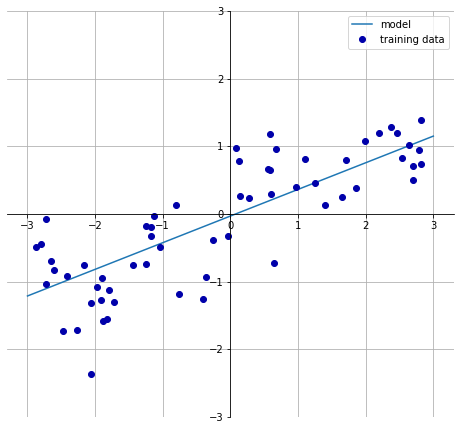

In [34]:
mglearn.plots.plot_linear_regression_wave()

#### 2.3.3.2  線形回帰(最小二乗法 ordinary least squares)

In [35]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

「勾配」を表すパラメーターwは､重み､もしくは係数（coefficient）と呼ばれ､coef_属性に格納される｡<br>
オフセットもしくは切片bはintercept_属性に格納される

In [36]:
print("lr.coef_:{}".format(lr.coef_[0]))
print("lr.intercept_:{}".format(lr.intercept_))
print("線形モデルは:\ny = {}*x{}".format(lr.coef_[0], lr.intercept_))

lr.coef_:0.39390555116733955
lr.intercept_:-0.031804343026759746
線形モデルは:
y = 0.39390555116733955*x-0.031804343026759746


In [37]:
print("Training set score:{:.3f}".format(lr.score(X_train, y_train)))
print("Test set score:{:.3f}".format(lr.score(X_test, y_test)))

Training set score:0.670
Test set score:0.659


テストセットと訓練セットに対する値が非常に近い､これはおそらく適合不足であって､過剰適合ではないことを意味する｡  
一次元はモデルがとても単純なので､過剰適合の危険は少ない

In [38]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [39]:
print("Training set score：{:.3f}".format(lr.score(X_train, y_train)))
print("Test set score:{:.3f}".format(lr.score(X_test, y_test)))

Training set score：0.952
Test set score:0.607


このようにテストセットと訓練セットで性能が大きく異るのは､過剰適合が起きている明らかな兆候だ｡  
したがって､複雑度を制御できるモデルを探さなければならない｡標準的な線形回帰に代わる最も一般的な手法は，リッジ回帰（ridge regression）である｡

#### 2.3.3.3  リッジ回帰

In [40]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
print("Training set score:{}".format(ridge.score(X_train, y_train)))
print("Test set score:{}".format(ridge.score(X_test, y_test)))

Training set score:0.8857966585170941
Test set score:0.7527683481744752


In [41]:
ridge10 = Ridge(alpha=10)
ridge10.fit(X_train, y_train)
print("Training set score:{:.3f}".format(ridge10.score(X_train, y_train)))
print("Test set score:{:.3f}".format(ridge10.score(X_test, y_test)))

Training set score:0.788
Test set score:0.636


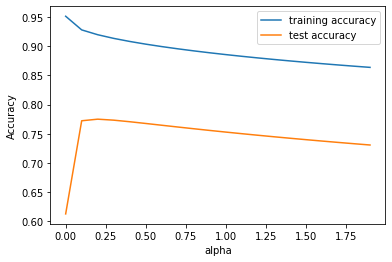

In [42]:
training_accuracy = []
test_accuracy = []
alpha_settings = np.arange(0, 2, 0.1)
for alpha in alpha_settings:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    train_score = ridge.score(X_train, y_train)
    test_score = ridge.score(X_test, y_test)  
    # print("alpha = {}, Training set score:{}".format(alpha, train_score))
    # print("alpha = {}, Test set score:{}".format(alpha, test_score))
    
    training_accuracy.append(train_score)
    test_accuracy.append(test_score)

plt.plot(alpha_settings, training_accuracy, label="training accuracy")
plt.plot(alpha_settings, test_accuracy, label="test accuracy")
plt.xlabel("alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

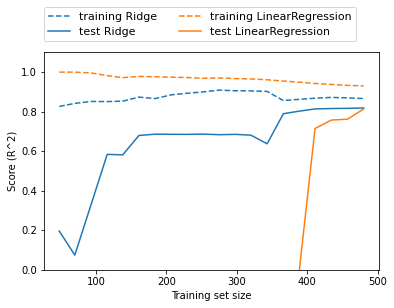

In [43]:
mglearn.plots.plot_ridge_n_samples()

#### 2.3.3.4  Lasso

In [44]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)
print("Training set score:{:.3f}".format(lasso.score(X_train, y_train)))
print("Test set score:{:.3f}".format(lasso.score(X_test, y_test)))
print("Number of feature used:{:}".format(np.sum(lasso.coef_ != 0)))
print("Number of feature unused:{:}".format(np.sum(lasso.coef_ == 0)))

Training set score:0.293
Test set score:0.209
Number of feature used:4
Number of feature unused:100


適合不足の度合を減らすためには、alphaの値を減らせばよい  
When we do this, we also need to increase the default setting of    <b>max_iter</b>(the maximum number of iterations to run)

In [45]:
lasso001 = Lasso(alpha=0.01, max_iter=1886)
lasso001.fit(X_train, y_train)
print("Training set score:{:.3f}".format(lasso001.score(X_train, y_train)))
print("Test set score:{:.3f}".format(lasso001.score(X_test, y_test)))
print("Number of feature used:{:}".format(np.sum(lasso001.coef_ != 0)))
print("Number of feature unused:{:}".format(np.sum(lasso001.coef_ == 0)))

Training set score:0.896
Test set score:0.766
Number of feature used:33
Number of feature unused:71


In [46]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000)
lasso00001.fit(X_train, y_train)
print("Training set score:{:.3f}".format(lasso00001.score(X_train, y_train)))
print("Test set score:{:.3f}".format(lasso00001.score(X_test, y_test)))
print("Number of feature used:{:}".format(np.sum(lasso00001.coef_ != 0)))
print("Number of feature unused:{:}".format(np.sum(lasso00001.coef_ == 0)))

Training set score:0.951
Test set score:0.644
Number of feature used:96
Number of feature unused:8


<font color=red>モデルに対して係数をプロットする<font>

Text(0, 0.5, 'Coefficient magnitude')

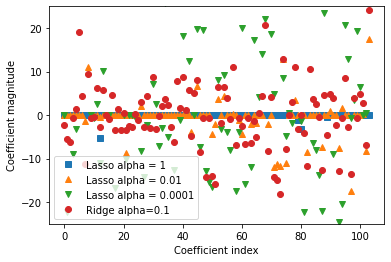

In [47]:
# %matplotlib auto
plt.plot(lasso.coef_, "s", label="Lasso alpha = 1")
plt.plot(lasso001.coef_, "^", label="Lasso alpha = 0.01")
plt.plot(lasso00001.coef_, "v", label="Lasso alpha = 0.0001")

plt.plot(Ridge(alpha=0.1).fit(X_train, y_train).coef_, "o", label="Ridge alpha=0.1")
plt.legend()
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

**My Steam Profile** *(from [SteamDB](https://steamdb.info/calculator/76561198311579608/?cc=jp))*

* **Worth:** ¥ 974155 (¥ 224233 with sales)
* **Games owned:** 1616
* **Games played:** 1041 *(64%)*
* **Hours on record:** 121,346.6h

In [48]:
1000-7

993

#### 2.3.3.5  クラス分類のための線形モデル

/Users/kanzakiken/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/Users/kanzakiken/venv/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


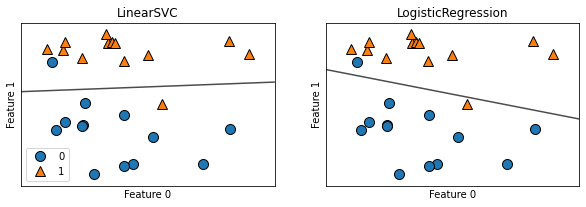

In [49]:
# %matplotlib auto
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

linearsvc = LinearSVC()
logisticregression = LogisticRegression()

for model, ax in zip([linearsvc, logisticregression], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()
plt.show()

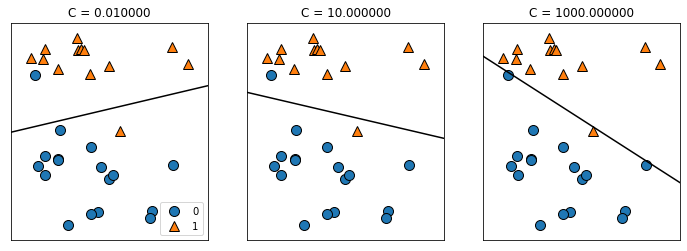

In [50]:
mglearn.plots.plot_linear_svc_regularization()

the higher value of c is, the less regularization will be  
换言之，当参数C使用较高的值时，LogisticRegression和LinearSVC会尽可能地拟合训练集，而当参数C的值较低时，模型更注重寻找接近于零的系数向量（w)  
使用较低的C值将导致算法尝试调整以适应“大多数”数据点，而使用较高的C值则强调每个单独的数据点被正确分类的重要性(overfitting)

In [52]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score:{:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score:{:.3f}".format(logreg.score(X_train, y_train)))


Training set score:0.946
Test set score:0.946


/Users/kanzakiken/venv/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
